In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Manipulation for creating the final dataset

In [2]:
# my_dir_path = r'C:\Users\giorg\Text Classification\space'
# results = defaultdict(list)
# for file in Path(my_dir_path).iterdir():
#     with open(file, "r") as file_open:
#        # results["file_name"].append(file.name)
#         results["text"].append(file_open.read())
# df1 = pd.DataFrame(results)

In [3]:
# df1.to_csv (r'C:\Users\giorg\export_dataframe_space.csv', index = False, header=True)

# Importing the dataset

In [4]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv(r'C:\Users\giorg\Information Retrieval\text_classification_dataset.csv', encoding = 'utf-8-sig')

# Data Exploration

In [5]:
df.head(3)

,text,class
0,"Lufthansa flies back to profit.German airline Lufthansa has returned to profit in 2004 after posting huge losses in 2003.In a preliminary report, the airline announced net profits of 400m euros ($527.61m; Β£274.73m), compared with a loss of 984m euros in 2003. Operating profits were at 380m euros, ten times more than in 2003. Lufthansa was hit in 2003 by tough competition and a dip in demand following the Iraq war and the killer SARS virus. It was also hit by troubles at its US catering business. Last year, Lufthansa showed signs of recovery even as some European and US airlines were teetering on the brink of bankruptcy. The board of Lufthansa has recommended paying a 2004 dividend of 0.30 euros per share. In 2003, shareholders did not get a dividend. The company said that it will give all the details of its 2004 results on 23 March.\n",business
1,"Winn-Dixie files for bankruptcy\n\nUS supermarket group Winn-Dixie has filed for bankruptcy protection after succumbing to stiff competition in a market dominated by Wal-Mart.\n\nWinn-Dixie, once among the most profitable of US grocers, said Chapter 11 protection would enable it to successfully restructure. It said its 920 stores would remain open, but analysts said it would most likely off-load a number of sites. The Jacksonville, Florida-based firm has total debts of $1.87bn (Β£980m). In its bankruptcy petition it listed its biggest creditor as US foods giant Kraft Foods, which it owes $15.1m.\n\nAnalysts say Winn-Dixie had not kept up with consumers' demands and had also been burdened by a number of stores in need of upgrading. A 10-month restructuring plan was deemed a failure, and following a larger-than-expected quarterly loss earlier this month, Winn-Dixie's slide into bankruptcy was widely expected. The company's new chief executive Peter Lynch said Winn-Dixie would use the Chapter 11 breathing space to take the necessary action to turn itself around. ""This includes achieving significant cost reductions, improving the merchandising and customer service in all locations and generating a sense of excitement in the stores,"" he said. Yet Evan Mann, a senior bond analyst at Gimme Credit, said Mr Lynch's job would not be easy, as the bankruptcy would inevitably put off some customers. ""The real big issue is what's going to happen over the next one or two quarters now that they are in bankruptcy and all their customers see this in their local newspapers,"" he said.\n",business
2,"US economy still growing says Fed\n\nMost areas of the US saw their economy continue to expand in December and early January, the US Federal Reserve said in its latest Beige Book report.\n\nOf the 12 US regions it identifies for the study, 11 showed stronger economic growth, with only the Cleveland area falling behind with a ""mixed"" rating. Consumer spending was higher in December than November, and festive sales were also up on 2003. The employment picture also improved, the Fed said.\n\n""Labour markets firmed in a number of districts, but wage pressures generally remained modest,"" the Beige Book said. ""Several districts reported higher prices for building materials and manufacturing inputs, but most reported steady or only slightly higher overall price levels."" The report added that residential real estate activity remained strong and that commercial real estate activity strengthened in most districts. ""Office leasing was especially brisk in Washington DC, and New York City, two of the nation's strongest commercial markets,"" the Fed said.\n",business


In [6]:
len(df)

361

In [7]:
df = df.drop_duplicates()

In [8]:
len(df)

358

In [9]:
df.groupby(['class']).size()

class
Art            72
Irrelevant     67
business       75
engineering    72
health         72
dtype: int64

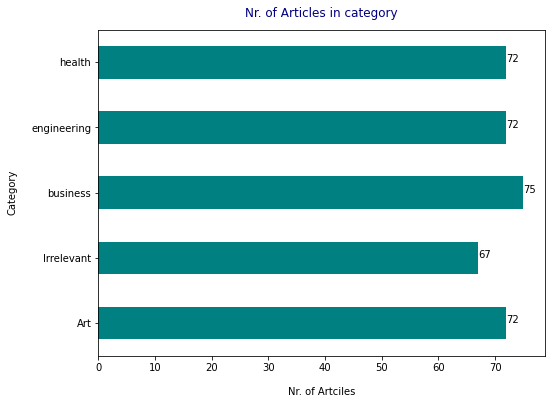

In [10]:
bar_plot=df.groupby(['class']).size().plot(kind='barh', figsize=(8, 6), color='teal')
plt.xlabel("Nr. of Artciles", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("Nr. of Articles in category", y=1.02, color='navy')

for index, value in enumerate(df.groupby(['class']).size()):
    plt.text(value, index, str(value))

# Data Preperation

In [11]:
# Art 0, Irrelevant 1, Business 2, Engineering 3, Health 4

label_enc = LabelEncoder()
df['label'] = label_enc.fit_transform(df['class'])


In [12]:
df['text'] = df['text'].map(lambda x: re.sub(r"[^\w+( +\w+)*$]", '', x)) # Remove special characters
df['text'] = df['text'].str.lower() # Turn them into lowercase
df['text'] = df['text'].map(lambda x:  re.sub(r'\s{2,}', ' ', x)) # Remove the doubled spaces
df['text'] = df['text'].map(lambda x:  re.sub(r'@\w+', '', x)) # Remove Mentions
df['text'] = df['text'].map(lambda x:  re.sub(r'[^\x00-\x7F]+', ' ', x)) # Remove Unicode
df['text'] = df['text'].map(lambda x:  re.sub(r'[%s]' % re.escape(string.punctuation), ' ', x)) # Remove punctuations


In [13]:
df.head(3)

,text,class,label
0,lufthansa flies back to profitgerman airline lufthansa has returned to profit in 2004 after posting huge losses in 2003in a preliminary report the airline announced net profits of 400m euros 52761m 27473m compared with a loss of 984m euros in 2003 operating profits were at 380m euros ten times more than in 2003 lufthansa was hit in 2003 by tough competition and a dip in demand following the iraq war and the killer sars virus it was also hit by troubles at its us catering business last year lufthansa showed signs of recovery even as some european and us airlines were teetering on the brink of bankruptcy the board of lufthansa has recommended paying a 2004 dividend of 030 euros per share in 2003 shareholders did not get a dividend the company said that it will give all the details of its 2004 results on 23 march,business,2
1,winndixie files for bankruptcyus supermarket group winndixie has filed for bankruptcy protection after succumbing to stiff competition in a market dominated by walmartwinndixie once among the most profitable of us grocers said chapter 11 protection would enable it to successfully restructure it said its 920 stores would remain open but analysts said it would most likely offload a number of sites the jacksonville floridabased firm has total debts of 187bn 980m in its bankruptcy petition it listed its biggest creditor as us foods giant kraft foods which it owes 151manalysts say winndixie had not kept up with consumers demands and had also been burdened by a number of stores in need of upgrading a 10month restructuring plan was deemed a failure and following a largerthanexpected quarterly loss earlier this month winndixies slide into bankruptcy was widely expected the companys new chief executive peter lynch said winndixie would use the chapter 11 breathing space to take the necessary action to turn itself around this includes achieving significant cost reductions improving the merchandising and customer service in all locations and generating a sense of excitement in the stores he said yet evan mann a senior bond analyst at gimme credit said mr lynchs job would not be easy as the bankruptcy would inevitably put off some customers the real big issue is whats going to happen over the next one or two quarters now that they are in bankruptcy and all their customers see this in their local newspapers he said,business,2
2,us economy still growing says fedmost areas of the us saw their economy continue to expand in december and early january the us federal reserve said in its latest beige book reportof the 12 us regions it identifies for the study 11 showed stronger economic growth with only the cleveland area falling behind with a mixed rating consumer spending was higher in december than november and festive sales were also up on 2003 the employment picture also improved the fed saidlabour markets firmed in a number of districts but wage pressures generally remained modest the beige book said several districts reported higher prices for building materials and manufacturing inputs but most reported steady or only slightly higher overall price levels the report added that residential real estate activity remained strong and that commercial real estate activity strengthened in most districts office leasing was especially brisk in washington dc and new york city two of the nations strongest commercial markets the fed said,business,2


In [14]:
# convert the text into an array

df_txt = np.array(df['text'])

In [15]:
# get the frequency

vectorizer = CountVectorizer()
vectorizer.fit(df_txt)
vectorizer.vocabulary_

{'lufthansa': 9836,
 'flies': 6758,
 'back': 2546,
 'to': 16241,
 'profitgerman': 12647,
 'airline': 1693,
 'has': 7726,
 'returned': 13603,
 'profit': 12643,
 'in': 8351,
 '2004': 543,
 'after': 1613,
 'posting': 12393,
 'huge': 8137,
 'losses': 9778,
 '2003in': 539,
 'preliminary': 12480,
 'report': 13434,
 'the': 15945,
 'announced': 2010,
 'net': 10970,
 'profits': 12648,
 'of': 11334,
 '400m': 857,
 'euros': 6156,
 '52761m': 986,
 '27473m': 682,
 'compared': 4192,
 'with': 17570,
 'loss': 9777,
 '984m': 1273,
 '2003': 537,
 'operating': 11513,
 'were': 17423,
 'at': 2374,
 '380m': 826,
 'ten': 15855,
 'times': 16198,
 'more': 10663,
 'than': 15923,
 'was': 17298,
 'hit': 7981,
 'by': 3377,
 'tough': 16343,
 'competition': 4210,
 'and': 1915,
 'dip': 5317,
 'demand': 5061,
 'following': 6824,
 'iraq': 8739,
 'war': 17277,
 'killer': 9186,
 'sars': 13981,
 'virus': 17164,
 'it': 8823,
 'also': 1811,
 'troubles': 16520,
 'its': 8844,
 'us': 16880,
 'catering': 3615,
 'business': 3346

In [16]:
# transform the vector into array

vectorizer.transform(df_txt).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
y = df['label']

In [18]:
text_train, text_test, y_train, y_test = train_test_split(df_txt, y, test_size=0.3, random_state=42)

In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(text_train)

CountVectorizer()

In [20]:
X_train = vectorizer.transform(text_train)
X_test  = vectorizer.transform(text_test)
X_train

<250x13950 sparse matrix of type '<class 'numpy.int64'>'
	with 45568 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [21]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter=7600)
lr_clf.fit(X_train, y_train)
lr_score = lr_clf.score(X_test, y_test)

###    *Evaluation of Logistic Regression*

In [22]:
print("Accuracy:", lr_score)
print('')
print('')
lr_predictions = lr_clf.predict(X_test)
print('The predicted labes for the test dataset are:')
print(lr_predictions)

Accuracy: 0.8981481481481481


The predicted labes for the test dataset are:
[3 2 4 1 2 1 3 2 3 4 3 3 0 3 4 4 0 0 4 1 3 4 3 2 1 3 0 1 2 2 3 1 1 0 4 2 2
 1 4 4 0 3 1 4 0 3 2 2 2 3 3 4 0 4 1 3 2 4 4 3 2 2 0 4 2 4 1 0 3 4 1 0 1 1
 0 4 0 0 2 2 4 2 1 0 1 1 0 0 4 3 1 4 1 4 3 3 1 4 4 4 1 3 3 4 0 3 1 3]


[[18  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  3 18  2  1]
 [ 0  0  0 20  3]
 [ 0  0  0  2 22]]




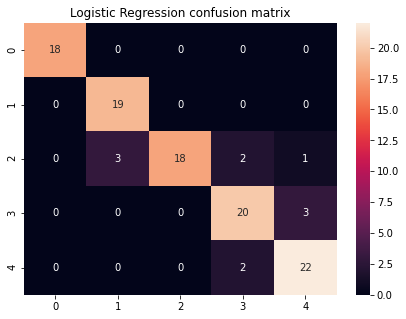

In [23]:
lr_cf_matrix = confusion_matrix(y_test, lr_predictions)
print(lr_cf_matrix)
print('')
print('')
df_cm = pd.DataFrame(lr_cf_matrix, range(5), range(5))
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt="d")
plt.title('Logistic Regression confusion matrix')

plt.show()

In [24]:
# Classification report

target_names = ['Art','Irrelevant','Business', 'Engineering', 'Health']
print('The classification report for Logistic Regression is:')
print('')
print('')
print(classification_report(y_test, lr_predictions, target_names=target_names))


The classification report for Logistic Regression is:


              precision    recall  f1-score   support

         Art       1.00      1.00      1.00        18
  Irrelevant       0.86      1.00      0.93        19
    Business       1.00      0.75      0.86        24
 Engineering       0.83      0.87      0.85        23
      Health       0.85      0.92      0.88        24

    accuracy                           0.90       108
   macro avg       0.91      0.91      0.90       108
weighted avg       0.91      0.90      0.90       108



# Support Vector Machine

In [25]:
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
svm_score = svm_clf.score(X_test, y_test)

###    *Evaluation of SVM*

In [26]:
print("Accuracy:", svm_score)
print('')
print('')
svm_predictions = svm_clf.predict(X_test)
print('The predicted labes for the test dataset are:')
print(svm_predictions)

Accuracy: 0.6481481481481481


The predicted labes for the test dataset are:
[4 4 4 0 2 1 4 2 4 4 4 4 0 3 4 4 0 0 4 1 4 4 4 2 1 4 0 0 2 2 4 0 1 0 4 2 1
 1 4 4 0 0 1 4 0 4 4 2 2 3 4 3 0 4 0 4 1 4 4 4 1 2 0 4 2 4 1 0 4 4 0 0 1 4
 0 4 1 0 2 2 4 2 1 0 1 0 0 0 4 4 2 4 1 4 4 4 1 4 1 4 1 2 4 4 0 4 0 4]


[[18  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  3 18  2  1]
 [ 0  0  0 20  3]
 [ 0  0  0  2 22]]




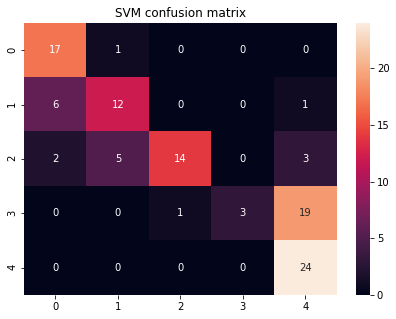

In [27]:
svm_cf_matrix = confusion_matrix(y_test, svm_predictions)
print(lr_cf_matrix)
print('')
print('')
df_cm = pd.DataFrame(svm_cf_matrix, range(5), range(5))
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt="d")
plt.title('SVM confusion matrix')

plt.show()

In [28]:
# Classification report

target_names = ['Art','Irrelevant','Business', 'Engineering', 'Health']
print('The classification report for Support Vector Machines is:')
print('')
print('')
print(classification_report(y_test, svm_predictions, target_names=target_names))


The classification report for Support Vector Machines is:


              precision    recall  f1-score   support

         Art       0.68      0.94      0.79        18
  Irrelevant       0.67      0.63      0.65        19
    Business       0.93      0.58      0.72        24
 Engineering       1.00      0.13      0.23        23
      Health       0.51      1.00      0.68        24

    accuracy                           0.65       108
   macro avg       0.76      0.66      0.61       108
weighted avg       0.76      0.65      0.60       108



# Naive Bayes

In [29]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_score = nb_clf.score(X_test, y_test)

###    *Evaluation of Naive Bayes*

In [30]:
print("Accuracy:", nb_score)
print('')
print('')
nb_predictions = nb_clf.predict(X_test)
print('The predicted labes for the test dataset are:')
print(nb_predictions)

Accuracy: 0.9351851851851852


The predicted labes for the test dataset are:
[3 2 3 1 2 1 2 2 3 4 3 3 0 3 4 4 0 0 4 1 2 3 3 2 1 3 0 1 2 2 3 1 1 0 4 2 2
 1 4 4 0 2 1 4 0 3 2 2 2 3 3 0 0 4 1 3 2 4 4 1 2 2 0 4 2 4 1 0 3 4 1 0 1 1
 0 4 0 0 2 2 1 2 1 0 1 1 0 0 4 3 2 4 1 4 3 1 2 4 2 4 1 3 3 4 0 3 1 3]


[[18  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 23  0  0]
 [ 1  2  0 20  0]
 [ 0  1  1  1 21]]




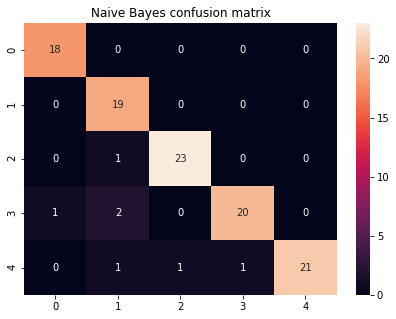

In [31]:
nb_cf_matrix = confusion_matrix(y_test, nb_predictions)
print(nb_cf_matrix)
print('')
print('')
df_cm = pd.DataFrame(nb_cf_matrix, range(5), range(5))
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt="d")
plt.title('Naive Bayes confusion matrix')

plt.show()

In [32]:
# Classification report

target_names = ['Art','Irrelevant','Business', 'Engineering', 'Health']
print('The classification report for Naive Bayes is:')
print('')
print('')

print(classification_report(y_test, nb_predictions, target_names=target_names))

The classification report for Naive Bayes is:


              precision    recall  f1-score   support

         Art       0.95      1.00      0.97        18
  Irrelevant       0.83      1.00      0.90        19
    Business       0.96      0.96      0.96        24
 Engineering       0.95      0.87      0.91        23
      Health       1.00      0.88      0.93        24

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



In [35]:
# Demonstration of a random sentence
# Art 0, Irrelevant 1, Business 2, Engineering 3, Health 4

demonstration = vectorizer.transform(["Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus."])
prediction = nb_clf.predict(demonstration)

if prediction == 0:
    print ('Art')
elif prediction == 1:
    print('Irrelebant')
elif prediction == 2:
    print('Business')
elif prediction == 3:
    print('Engineering')
elif prediction == 4:
    print('Health')
    

Health
